# Pandas ライブラリでファイル入出力を学ぶ

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

input_dir = "/content/drive/MyDrive/input/"
output_dir = "/content/drive/MyDrive/output/"

# このあたりは、無意識に打ち込むかんじで。

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


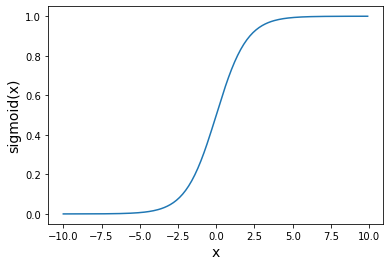

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel("x", fontsize=14)
plt.ylabel("sigmoid(x)", fontsize=14)
plt.show()


In [6]:
# np.ndarray型 -> pandas.DataFrame型に変換
z = np.c_[x, y] #  ndarrayを列方向に結合したのち、
df = pd.DataFrame(z, columns=['x', 'sigmold(x)']) # 一気にデータフレーム型に変換、列名を指定する

df.head() # ()内になにもないと最初の5行を表示、括弧内に数字をいれるのその行数分だけ確認できる。

,x,sigmold(x)
0,-10.0,0.000045
1,-9.9,0.000050
2,-9.8,0.000055
3,-9.7,0.000061
4,-9.6,0.000068


In [7]:
# CSVファイルへの保存
df.to_csv(output_dir + "sigmoid1.csv", index=False)

In [8]:
# CSVファイルからの読み込み
data = pd.read_csv(output_dir + "sigmoid1.csv")
data.head(5)


,x,sigmold(x)
0,-10.0,0.000045
1,-9.9,0.000050
2,-9.8,0.000055
3,-9.7,0.000061
4,-9.6,0.000068


In [9]:
# pandas の DataFrame 型から、データ抽出とと numpy の ndarray 型へ変換
print (np.array(data['sigmold(x)']))


[4.53978687e-05 5.01721647e-05 5.54485247e-05 6.12797396e-05
 6.77241496e-05 7.48462275e-05 8.27172229e-05 9.14158739e-05
 1.01029194e-04 1.11653341e-04 1.23394576e-04 1.36370327e-04
 1.50710358e-04 1.66558065e-04 1.84071905e-04 2.03426978e-04
 2.24816770e-04 2.48455082e-04 2.74578156e-04 3.03447030e-04
 3.35350130e-04 3.70606141e-04 4.09567165e-04 4.52622223e-04
 5.00201107e-04 5.52778637e-04 6.10879359e-04 6.75082731e-04
 7.46028834e-04 8.24424686e-04 9.11051194e-04 1.00677082e-03
 1.11253603e-03 1.22939862e-03 1.35851995e-03 1.50118226e-03
 1.65880108e-03 1.83293894e-03 2.02532039e-03 2.23784852e-03
 2.47262316e-03 2.73196076e-03 3.01841632e-03 3.33480731e-03
 3.68423990e-03 4.07013772e-03 4.49627316e-03 4.96680165e-03
 5.48629890e-03 6.05980149e-03 6.69285092e-03 7.39154134e-03
 8.16257115e-03 9.01329865e-03 9.95180187e-03 1.09869426e-02
 1.21284350e-02 1.33869178e-02 1.47740317e-02 1.63024994e-02
 1.79862100e-02 1.98403057e-02 2.18812709e-02 2.41270214e-02
 2.65969936e-02 2.931223

すべての列が別々の変数に格納された状態は、プログラムとしては使いにくいのでので、、<BR>
列をを DataFrame 型の変数の右に追加していく方法を説明しておく。<BR>
もっと便利ややりかたの情報を募集します。<BR>

In [10]:
df1 = pd.DataFrame(x, columns=['x'])
df1.head()
df1.shape

(200, 1)

In [11]:
df2 = pd.DataFrame(y, columns=['sigmold(x)'])
df2.head()
df2.shape

(200, 1)

In [12]:
df_concat = pd.concat([df1, df2], axis=1) # axis=1は列方向に連結、指定しないまたはまたはaxis=0のときは行連結になるので注意。
df_concat.head()


,x,sigmold(x)
0,-10.0,0.000045
1,-9.9,0.000050
2,-9.8,0.000055
3,-9.7,0.000061
4,-9.6,0.000068


In [13]:
df_concat = pd.concat([df_concat, df2], axis=1) # 後ろに追加してみる。
df_concat.head()

,x,sigmold(x),sigmold(x)
0,-10.0,0.000045,0.000045
1,-9.9,0.000050,0.000050
2,-9.8,0.000055,0.000055
3,-9.7,0.000061,0.000061
4,-9.6,0.000068,0.000068


In [14]:
# CSVファイルへの保存
df_concat.to_csv(output_dir + "sigmoid2.csv", index=False)